In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

zomato=pd.read_csv("C:/Users/mchil/Downloads/Python batch/Python Pred Modeling All notebooks + Datasets/Python Datasets/Regression Datasets/ZomatoData.csv",encoding='latin-1')
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [3]:
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [4]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range', 'Votes',
       'Average Cost for two', 'Rating'],
      dtype='object')

#### Defining Problem Statement
* Target:- Rating
* Predictors :- Id,Name,location,city ,etc.

### Analysing Distribution of Target Variable

<AxesSubplot:>

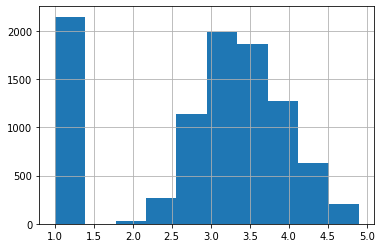

In [5]:
zomato['Rating'].hist()

#### Basic Data Exploration 
* info()
* describe()
* nunique()

In [6]:
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [7]:
print(zomato.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [8]:
zomato.describe(include='all')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551.000000,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,12,2,2,2,1,NaN,NaN,NaN,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,NaN,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,8652,8393,7100,9517,9551,NaN,NaN,NaN,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,NaN,NaN,NaN,NaN,NaN,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,NaN,NaN,NaN,NaN,NaN,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,131.000000,700.000000,3.700000


In [9]:
zomato.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

### Feature Engieering
* Calculating the number of cusines for each restaurant which can be used for ML (not as categ or conti variable)
* If we extract the zip code from address it can not be used as categorical variable as have too many values

In [10]:
def cousine_split(inp):
    return len(str(inp).split(','))

In [11]:
zomato['Cuisines_count']=zomato['Cuisines'].apply(cousine_split)

In [12]:
zomato.head()
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range', 'Votes',
       'Average Cost for two', 'Rating', 'Cuisines_count'],
      dtype='object')

### Variable Analysis

* Target: -Rating
* Continuos Variables :- Longitude,Latitude,Votes,Average Cost for two
* Categorical Variables:- Country Code,'Currency', 'Has Table booking', 'Has Online delivery','Is delivering now', 'Switch to order menu', 'Price range'

* Removing Useless Columns

In [13]:
rem=['Restaurant ID', 'Restaurant Name','City','Address',
                  'Locality', 'Locality Verbose','Cuisines']
zomato.drop(rem,axis=1,inplace=True)

In [14]:
zomato.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Votes', 'Average Cost for two',
       'Rating', 'Cuisines_count'],
      dtype='object')

#### Univariate Analysis
* Continuous Variables

array([[<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Votes'}>,
        <AxesSubplot:title={'center':'Average Cost for two'}>]],
      dtype=object)

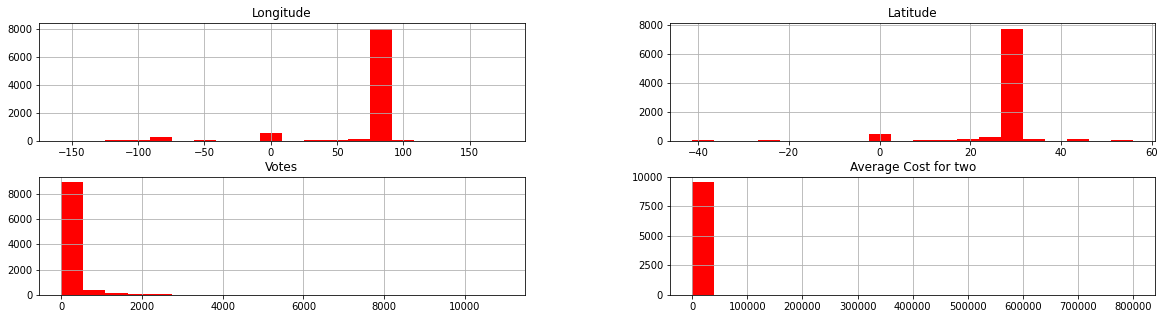

In [15]:
zomato.hist(['Longitude','Latitude','Votes','Average Cost for two'],figsize=(20,5),bins=20,color='red')

In [16]:
zomato['Average Cost for two'][zomato['Average Cost for two']<50000].sort_values(ascending=False)

7543    8000
4088    7000
4087    6500
7494    6000
7538    6000
        ... 
85         0
87         0
240        0
397        0
9242       0
Name: Average Cost for two, Length: 9530, dtype: int64

<AxesSubplot:>

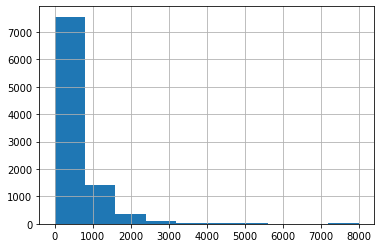

In [17]:
zomato['Average Cost for two'][zomato['Average Cost for two']>50000]=8000
zomato['Average Cost for two'].hist()

In [18]:
zomato['Votes'][zomato['Votes']<4000].sort_values(ascending=False)

7863    3986
821     3848
3992    3697
3119    3591
1861    3569
        ... 
4801       0
4803       0
4805       0
4807       0
4784       0
Name: Votes, Length: 9532, dtype: int64

<AxesSubplot:>

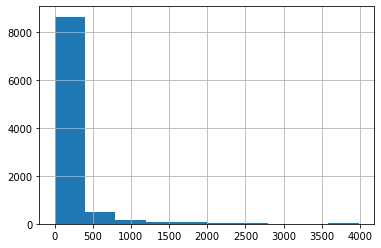

In [19]:
zomato['Votes'][zomato['Votes']>4000]=3986
zomato['Votes'].hist()

* Categorical Variable

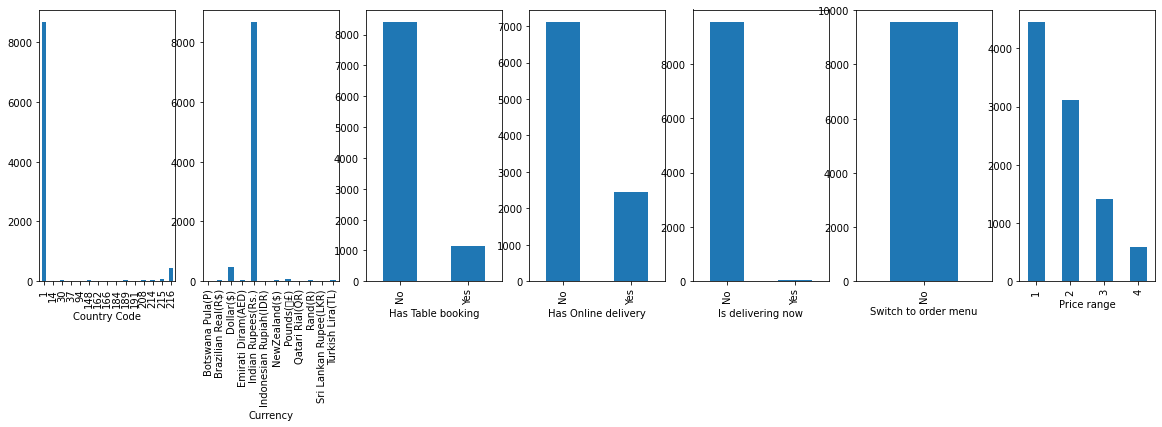

In [20]:
categ=['Country Code','Currency', 'Has Table booking', 'Has Online delivery','Is delivering now', 'Switch to order menu', 'Price range']

fig,subplot=plt.subplots(nrows=1,ncols=len(categ),figsize=(20,5))

for i,j in zip(categ,range(len(categ))):
    zomato.groupby(i).size().plot(kind='bar',ax=subplot[j])
    

#### Selected
* Continuous :- all
* Categorical :- Has Table booking,Has Online Delivery,Price Range

### Bivariate Analysis

* Continuous vs Continuous

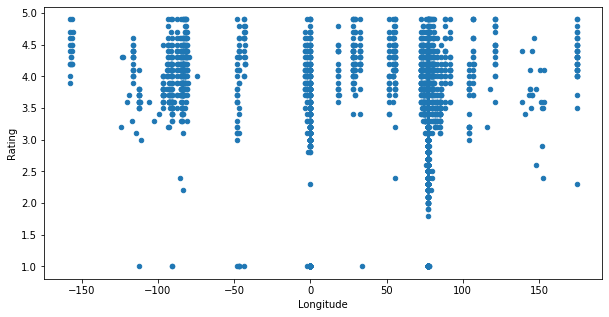

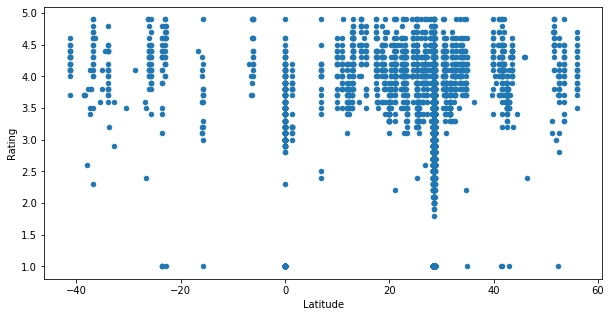

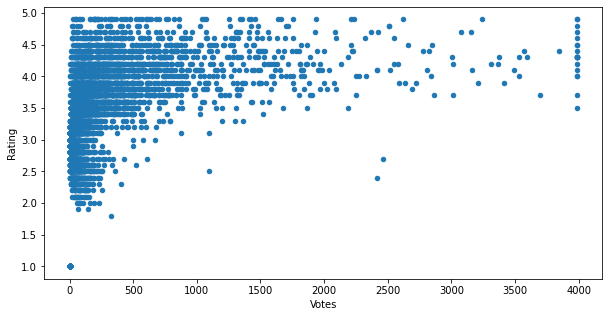

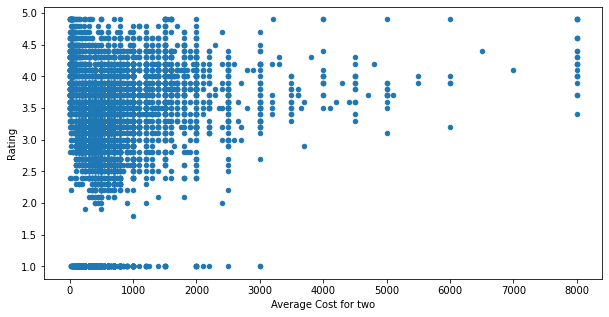

In [21]:
conti=['Longitude','Latitude','Votes','Average Cost for two']

for i in conti:
    zomato.plot.scatter(x=i,y='Rating',figsize=(10,5))

In [22]:
zomato.corr().loc[conti]['Rating']

Longitude              -0.145930
Latitude               -0.019806
Votes                   0.385249
Average Cost for two    0.248981
Name: Rating, dtype: float64

* Selected :- Votes,Average Cost of two

* Categorical vs continuous

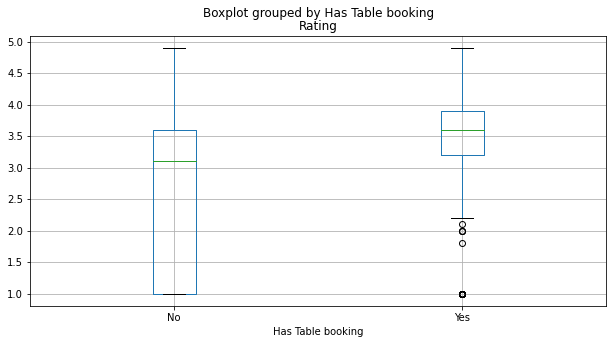

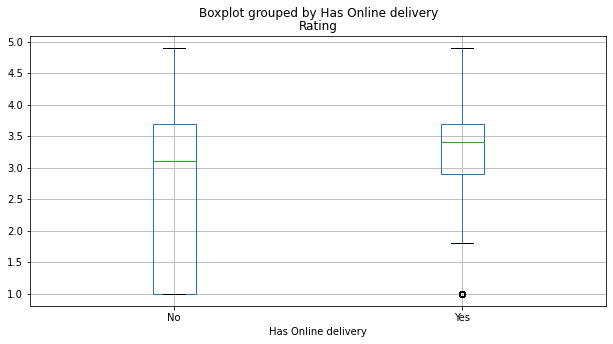

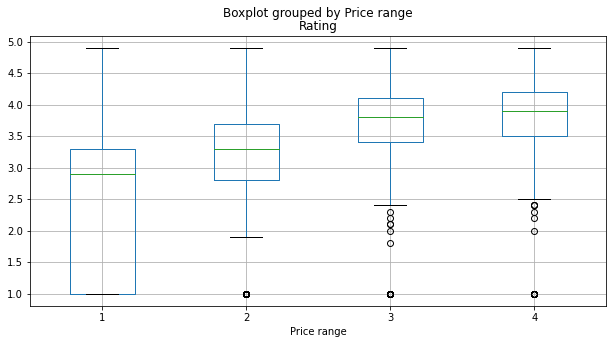

In [23]:
for i in ["Has Table booking","Has Online delivery","Price range"]:
    zomato.boxplot(column='Rating',by=i,figsize=(10,5))

In [24]:
zomato.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Votes', 'Average Cost for two',
       'Rating', 'Cuisines_count'],
      dtype='object')

In [25]:
# Anova Test 

def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [26]:
def my_anova(df,target,categ):
    from scipy.stats import f_oneway
    
    for predictor in categ:
        grouplist=df.groupby(predictor)[target].apply(list)
        
        res=f_oneway(*grouplist)
        
        if res[1]<0.05:
            print(predictor,"Selected")
        else:
            print(predictor,"Not Selected")
        
    
    
    

In [27]:
my_anova(zomato,'Rating', ["Has Table booking","Has Online delivery","Price range"])

Has Table booking Selected
Has Online delivery Selected
Price range Selected


In [28]:
FunctionAnova(zomato,'Rating', ["Has Table booking","Has Online delivery","Price range"])


##### ANOVA Results ##### 

Has Table booking is correlated with Rating | P-Value: 3.9393041304297214e-82
Has Online delivery is correlated with Rating | P-Value: 1.6952587420575958e-92
Price range is correlated with Rating | P-Value: 0.0


['Has Table booking', 'Has Online delivery', 'Price range']

#### Final Selected
* Continuous :- Votes,Average Cost of two
* Categorical:- "Has Table booking","Has Online delivery","Price range"
* Target :- Rating



### Extracting Selected Predictors

In [29]:
Predictors=["Votes","Average Cost for two", "Has Table booking","Has Online delivery","Price range"]
Target='Rating'

ZomatoDataML=zomato[Predictors]
ZomatoDataML[Target]=zomato[Target]
ZomatoDataML.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating
0,314,1100,Yes,No,3,4.8
1,591,1200,Yes,No,3,4.5
2,270,4000,Yes,No,4,4.4
3,365,1500,No,No,4,4.9
4,229,1500,Yes,No,4,4.8


### Preparing data for ML
* <h4>Converting Categorical Features to Numerical

In [32]:
# Replacing Nominal Binary
ZomatoDataML['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
ZomatoDataML['Has Online delivery'].replace({'No':0,'Yes':1},inplace=True)

In [35]:
ZomatoDataML['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
ZomatoDataML['Has Table booking'].replace({'No':0,'Yes':1},inplace=True)

In [37]:
ZomatoDataML.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating
0,314,1100,1,0,3,4.8
1,591,1200,1,0,3,4.5
2,270,4000,1,0,4,4.4
3,365,1500,0,0,4,4.9
4,229,1500,1,0,4,4.8


* <h4>Splitting Data Into Train/Test

In [38]:
from sklearn.model_selection import train_test_split

X=ZomatoDataML[Predictors].values
y=ZomatoDataML[Target].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6685, 5)
(2866, 5)
(6685,)
(2866,)


* <h4>Standardization/Normalization of Data (Optional)

In [40]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X=MinMaxScaler().fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)

In [41]:
X_train

array([[0.0286001 , 0.005     , 0.        , 0.        , 0.66666667],
       [0.        , 0.075     , 0.        , 0.        , 0.33333333],
       [0.11264425, 0.0125    , 0.        , 1.        , 1.        ],
       ...,
       [0.00175615, 0.06875   , 0.        , 0.        , 0.33333333],
       [0.00326141, 0.04375   , 0.        , 0.        , 0.        ],
       [0.02433517, 0.05      , 0.        , 0.        , 1.        ]])

### Multiple Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

LR=LinearRegression()
LR.fit(X_train,y_train)


print("R2 score of Fitted model is :-",metrics.r2_score(y_train,LR.predict(X_train)))
print("Coef:-",LR.coef_,"\nIntercept :-",LR.intercept_)
print('------------------------------------------------------------------------------')

predLR=LR.predict(X_test)

# Storing Test Results
TestScoreLR=pd.DataFrame(X_test,columns=Predictors)
TestScoreLR[Target]=y_test
TestScoreLR[Target+'_Predicted']=np.round(predLR,2)

# APE (Absolute Percentage Error)
TestScoreLR['APE']=(np.abs(TestScoreLR[Target]-TestScoreLR[Target+'_Predicted'])/TestScoreLR[Target])*100

# MAPE (Mean Absolute Percentage Error)
MAPE=TestScoreLR['APE'].mean()
# Median APE
MedAPE=TestScoreLR['APE'].median()

print(TestScoreLR[[Target,Target+'_Predicted','APE']])
print('------------------------------------------------------------------------------')
print("Mean Accuracy of Model is :- ",round(100-MAPE,2),'%')
print("Median Accuracy of Model is :- ",round(100-MedAPE,2),'%')


R2 score of Fitted model is :- 0.3046417614362338
Coef:- [ 3.17137992 -0.85074413 -0.19097604  0.42882614  1.57908369] 
Intercept :- 2.3315005306338676
------------------------------------------------------------------------------
      Rating  Rating_Predicted         APE
0        3.6              3.55    1.388889
1        3.7              3.01   18.648649
2        4.6              4.23    8.043478
3        3.2              2.31   27.812500
4        4.2              3.37   19.761905
...      ...               ...         ...
2861     3.2              3.36    5.000000
2862     1.0              2.32  132.000000
2863     3.7              3.89    5.135135
2864     4.1              3.16   22.926829
2865     2.8              2.29   18.214286

[2866 rows x 3 columns]
------------------------------------------------------------------------------
Mean Accuracy of Model is :-  53.15 %
Median Accuracy of Model is :-  78.33 %


#### Cross Validating Model

In [43]:
def MAPE_score(orig,pred):
    APE=(np.abs(orig-pred)/orig)*100
    MAPE=np.mean(APE)
    return 100-MAPE

# Making Custom Scoring
scorer=make_scorer(MAPE_score,greater_is_better=True)

CV=cross_val_score(LR,X,y,cv=10,scoring=scorer)
print(CV)
print("Final Mean Accuracy of Model is :-",round(np.mean(CV),2),'%')
#### Cross Validating Model

[73.07128832 57.23634237 61.61405423 59.97790149 62.17608774 29.03036814
 48.84028175 51.06832392 40.27174351 53.61838933]
Final Mean Accuracy of Model is :- 53.69 %


### Decision Tree Regressor

R2 score of Fitted Model is :-  0.9098013838209518
------------------------------------------------------------------------------
      Rating  Rating_predicted        APE
0        3.6          3.749684   4.157876
1        3.7          3.733730   0.911626
2        4.6          4.112081  10.606945
3        3.2          3.057143   4.464286
4        4.2          3.440611  18.080682
...      ...               ...        ...
2861     3.2          3.440611   7.519105
2862     1.0          1.000000   0.000000
2863     3.7          4.055385   9.604990
2864     4.1          3.893023   5.048213
2865     2.8          2.962264   5.795148

[2866 rows x 3 columns]
------------------------------------------------------------------------------
Mean Accuracy of Model is  :-  93.16 %
Median Accuracy of Model is :- 95.65 %
Feature Importances :- 



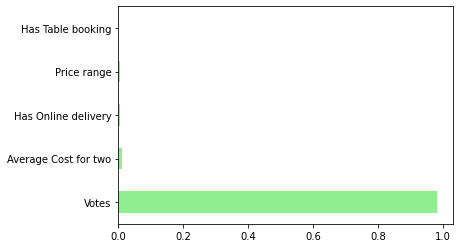

[90.79867804 92.40734815 92.36096482 92.60045486 92.95525464 95.05770184
 93.713076   93.81800852 92.90082114 91.96501727]
Final Mean Accuracy of Model is :-  92.86 %


In [50]:
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor(max_depth=6,criterion='mse')
DT.fit(X_train,y_train)

print("R2 score of Fitted Model is :- ",metrics.r2_score(y_train,DT.predict(X_train)))
print('------------------------------------------------------------------------------')
predDT=DT.predict(X_test)

TestScoreDT=pd.DataFrame(X_test,columns=Predictors)
TestScoreDT[Target]=y_test
TestScoreDT[Target+'_predicted']=predDT
TestScoreDT['APE']=(np.abs(TestScoreDT[Target]-TestScoreDT[Target+'_predicted'])/TestScoreLR[Target])*100

MAPE=TestScoreDT['APE'].mean()

MedAPE=TestScoreDT['APE'].median()
print(TestScoreDT[[Target,Target+'_predicted','APE']])
print('------------------------------------------------------------------------------')
print("Mean Accuracy of Model is  :- ",round(100-MAPE,2),'%')
print("Median Accuracy of Model is :-",round(100-MedAPE,2),'%')

# Plotting The Feature Imporatances
print("Feature Importances :- \n")
features=pd.Series(DT.feature_importances_,index=Predictors)
features.nlargest(10).plot(kind='barh',color='lightgreen')
plt.show()

# ---------------------------------------------------------------------------------------------
# Cross Validation of Model
scorerDT=make_scorer(MAPE_score,greater_is_better=True)
CV=cross_val_score(DT,X,y,cv=10,scoring=scorerDT)
print(CV)
print("Final Mean Accuracy of Model is :- ",round(np.mean(CV),2),'%')

#### Plotting Decision Tree (Optional as Trees are too big to plot)

In [51]:
from IPython.display import Image
import pydotplus
from sklearn import tree

dot_data=tree.export_graphviz(DT,out_file=None,feature_names=Predictors,class_names=Target)

tree=pydotplus.graph_from_dot_data(dot_data)

# print(dot_data)



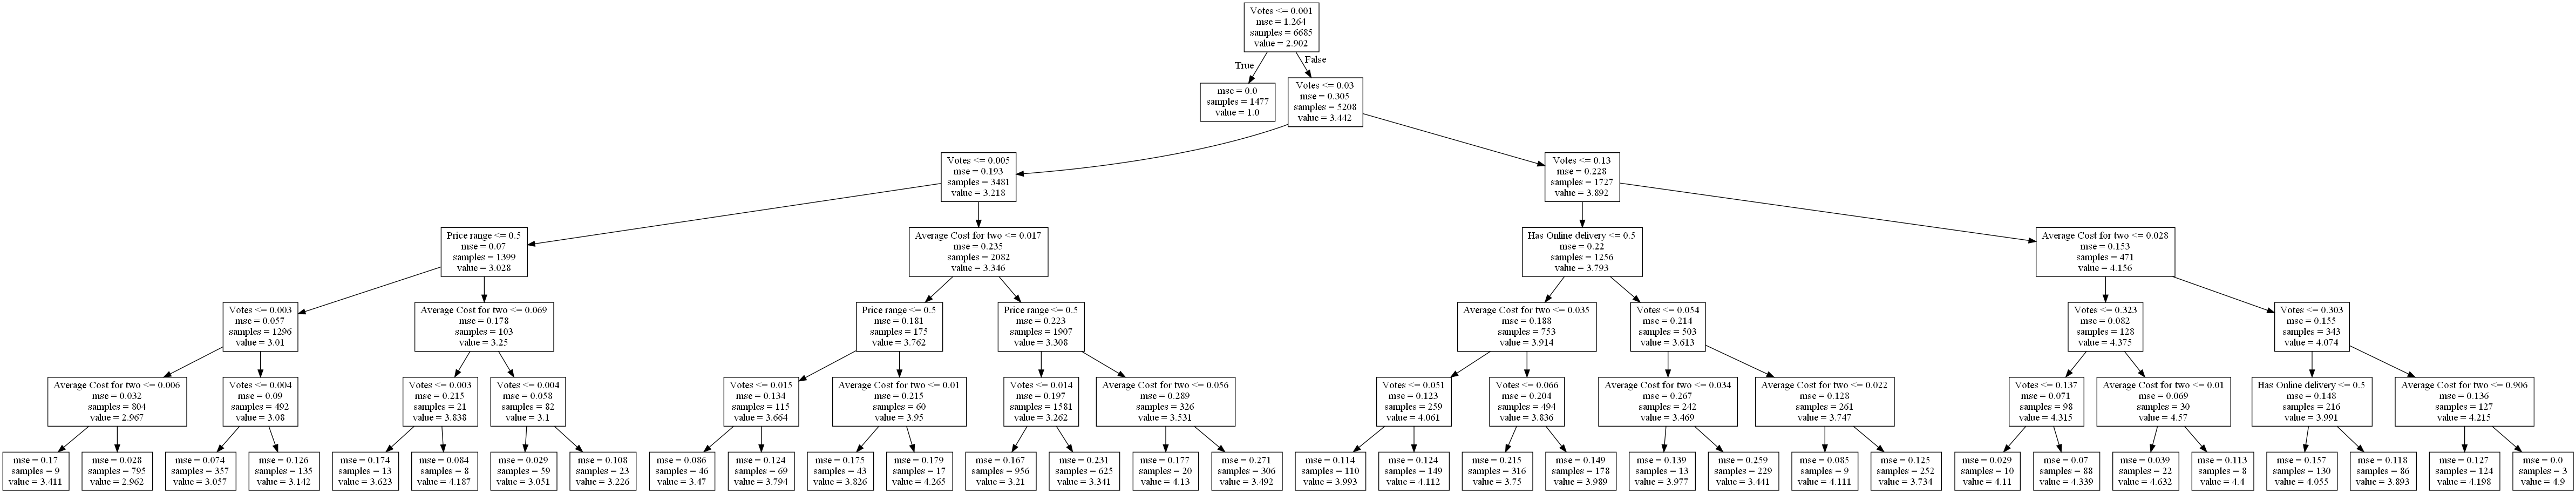

In [55]:
Image(tree.create_png(),width=5000,height=5000)